# The objectives comprised of two folds:
# <a href='#resting-state'>1. Resting State</a>

# <a href='#ISC'>2. Inter-subject Correlation study (ISC)</a>

In [1]:
import mne
import pathlib
from mne.externals.pymatreader import read_mat
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
import numpy as np

In [2]:
from warnings import simplefilter 
simplefilter(action='ignore', category=DeprecationWarning)

In [2]:
import os
subjs = ['NDARCD401HGZ','NDARDX770PJK', 'NDAREZ098ZPE', 'NDARGY054ENV', 'NDARMR242UKQ', 'NDARRD720XZK', 'NDARTR840XP1', 'NDARXJ696AMX', 'NDARYY218AGA', 'NDARZP564MHU']


/users/local/Venkatesh/HBN


In [4]:
def csv_to_raw_mne(path_to_file,path_to_montage_ses,fs,path_to_events,filename,state,montage = 'GSN-HydroCel-129'):
    ''' Load csv files of data, chan locations and events and return a raw mne instance'''
    data = np.loadtxt(path_to_file,delimiter =',')
    chans = pd.read_csv(path_to_montage_ses,sep = ',',header = None)
    ch_list=['E1', 'E8', 'E14', 'E17', 'E21', 'E25', 'E32', 'E38', 'E43', 'E44', 'E48', 'E49', 'E56', 'E57', 'E63', 'E64', 'E69', 'E73', 'E74', 'E81', 'E82', 'E88', 'E89', 'E94', 'E95', 'E99', 'E100', 'E107', 'E113', 'E114', 'E119', 'E120', 'E121', 'E125', 'E126', 'E127', 'E128']
    print(len(ch_list))
    ch_names = list(chans.values[1:,0])

    
    if state == 'Rest':
        ch_names_appended = list(np.append(ch_names,'stim_channel'))
        types = ['eeg']*(len(ch_names_appended)-1)
        types.append('stim')
        data2 = np.zeros([1,len(data[0])]) #len(raw.times)
        data_appended = np.append(data,data2,axis = 0)
        info = mne.create_info(ch_names_appended,sfreq = fs,ch_types = types)
        raw = mne.io.RawArray(data_appended, info)
    
    else:   
        types = ['eeg']*(len(ch_names))
        info = mne.create_info(ch_names,sfreq = fs,ch_types = types)
        raw = mne.io.RawArray(data, info)
    
    # set standard montage
    if montage:
        raw.set_montage(montage)

    if path_to_events:
        # parse events file
        raw_events = pd.read_csv(path_to_events, sep = r'\s*,\s*', header = None, engine = 'python')
        values = raw_events[0].to_list()
        
        
        print(filename)
        if filename == 'NDARDX770PJK':
            values.extend(["break cnt"])
            
        idx = [i for i, e in enumerate(values) if e == 'break cnt']
        if state == 'Rest': 
            #idx = [i for i, e in enumerate(values) if e == 'break cnt']
            samples = raw_events[1][idx[0] + 1:idx[1]].to_numpy(dtype = int)
            event_values = raw_events[0][idx[0] + 1:idx[1]].to_numpy(dtype = int)
            
        else:
            samples = raw_events[1][1:idx[0]].to_numpy(dtype = int)
            event_values = raw_events[0][1:idx[0]].to_numpy(dtype = int)
     

        events = np.zeros((len(samples), 3))
        
        events = events.astype('int')
        events[:, 0] = samples
        events[:, 2] = event_values
        
        # Appending one row of 'ones'. Will be easier to stop parsing once we hit 1
        events_final = np.append(events,np.ones((1, 3)),axis = 0).astype('int')
        raw = exclude_channels_from_raw(raw, ch_list)
        
    return raw,events_final

def exclude_channels_from_raw(raw,ch_to_exclude):
    '''Return a raw structure where ch_to_exclude are removed'''
    idx_keep = mne.pick_channels(raw.ch_names,include = raw.ch_names,exclude = ch_to_exclude)
    raw.pick_channels([raw.ch_names[pick] for pick in idx_keep])
    print('yes')
    return raw



def preparation(filename,state):
    path_to_file = '%s/EEG/preprocessed/csv_format/Video3_data.csv'% filename
    path_to_events = '%s/EEG/preprocessed/csv_format/Video3_event.csv' %filename
    path_to_montage_glob = 'GSN_HydroCel_129_hbn.sfp'
    path_to_montage_ses = '%s/EEG/preprocessed/csv_format/Video3_chanlocs.csv' %filename
    fs = 500
    chans_glob = mne.channels.read_custom_montage(fname = 'GSN_HydroCel_129_hbn.sfp') # read_montage is deprecated
# channels to exclude because noisy (Nentwich paper)


    raw, events = csv_to_raw_mne(path_to_file,path_to_montage_ses,fs,path_to_events,state=state,filename=filename,montage = 'GSN-HydroCel-129')
    #raw.add_events(events, stim_channel = 'stim_channel',replace = False)
    return raw,events

def preparation_resting_state(filename,state):
    path_to_file = '%s/EEG/preprocessed/csv_format/RestingState_data.csv'% filename
    path_to_events = '%s/EEG/preprocessed/csv_format/RestingState_event.csv' %filename
    path_to_montage_glob = 'GSN_HydroCel_129_hbn.sfp'
    path_to_montage_ses = '%s/EEG/preprocessed/csv_format/RestingState_chanlocs.csv' %filename
    fs = 500
    chans_glob = mne.channels.read_custom_montage(fname = 'GSN_HydroCel_129_hbn.sfp') # read_montage is deprecated


    raw, events = csv_to_raw_mne(path_to_file,path_to_montage_ses,fs,path_to_events,filename=filename,state=state,montage = 'GSN-HydroCel-129')
    #raw.add_events(events, stim_channel = 'stim_channel',replace = False)
    return raw,events

In [5]:
cd /users/local/Venkatesh/HBN/


/users/local/Venkatesh/HBN


# Resting State <a id='resting-state'></a>

In [6]:

for i in  [ v for v in np.arange(10) if v != 2]:
        globals()[f"rstate{i}"],globals()[f"rstate{i}_events"] = preparation_resting_state(subjs[i],'Rest')

rstate_bundle = [rstate0,rstate1,rstate3,rstate4,rstate5,rstate6,rstate7,rstate8,rstate9]
rstate_events_bundle = [rstate0_events,rstate1_events,rstate3_events,rstate4_events,rstate5_events,rstate6_events,rstate7_events,rstate8_events,rstate9_events]


KeyboardInterrupt: 

# 2. Video-Watching state (Inter-subject Correlation Study)  <a id='ISC'></a>

In [3]:
sub1_raw,sub1_events = preparation(subjs[0],'others')
sub2_raw,sub2_events = preparation(subjs[1],'others')
sub3_raw,sub3_events = preparation(subjs[2],'others')
sub4_raw,sub4_events = preparation(subjs[3],'others')
sub5_raw,sub5_events = preparation(subjs[4],'others')
sub6_raw,sub6_events = preparation(subjs[5],'others')
sub7_raw,sub7_events = preparation(subjs[6],'others')
sub8_raw,sub8_events = preparation(subjs[7],'others')
sub9_raw,sub9_events = preparation(subjs[8],'others')
sub10_raw,sub10_events = preparation(subjs[9],'others')



NameError: name 'preparation' is not defined

In [3]:
cd

/homes/v20subra


In [4]:
cd S4B2

/homes/v20subra/S4B2


In [5]:
# Import
from Modular_Scripts import epochs_slicing 
from Modular_Scripts import CCA
from Modular_Scripts import plot_matplotlib
from Modular_Scripts import source_inversion, surface_plot, fwd_model
from imp import reload 


reload(epochs_slicing)
reload(CCA)
reload(source_inversion)
reload(surface_plot)
reload(fwd_model)


0 files missing from root.txt in /homes/v20subra/mne_data/MNE-fsaverage-data
0 files missing from bem.txt in /homes/v20subra/mne_data/MNE-fsaverage-data/fsaverage


/homes/v20subra/.local/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


0 files missing from root.txt in /homes/v20subra/mne_data/MNE-fsaverage-data
0 files missing from bem.txt in /homes/v20subra/mne_data/MNE-fsaverage-data/fsaverage
0 files missing from root.txt in /homes/v20subra/mne_data/MNE-fsaverage-data
0 files missing from bem.txt in /homes/v20subra/mne_data/MNE-fsaverage-data/fsaverage
0 files missing from root.txt in /homes/v20subra/mne_data/MNE-fsaverage-data
0 files missing from bem.txt in /homes/v20subra/mne_data/MNE-fsaverage-data/fsaverage


<module 'Modular_Scripts.fwd_model' from '/homes/v20subra/S4B2/Modular_Scripts/fwd_model.py'>

### Source Inversion on Specific chunk of Raw EEG (100ms window around the peak of the peak)

In [10]:
def epochs(title,raw_bundle,events_bundle):
    for i in range(1, 11):
        globals()[f"epochs{i}_ISC"+title] = epochs_slicing.epochs(raw_bundle[i-1],events_bundle[i-1],[83,103,9999], tmin=0, tmax=170, fs = 500, epochs_to_slice='83')

In [11]:
reload(epochs_slicing)

raw_bundle = [sub1_raw,sub2_raw,sub3_raw,sub4_raw,sub5_raw,sub6_raw,sub7_raw,sub8_raw,sub9_raw,sub10_raw]
events_bundle = [sub1_events,sub2_events,sub3_events,sub4_events,sub5_events,sub6_events,sub7_events,sub8_events,sub9_events,sub10_events]

epochs("_g",raw_bundle,events_bundle)



Not setting metadata
Not setting metadata
3 matching events found
Setting baseline interval to [0.0, 170.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 3 events and 85001 original time points ...
1 bad epochs dropped
Not setting metadata
Not setting metadata
3 matching events found
Setting baseline interval to [0.0, 170.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 3 events and 85001 original time points ...
1 bad epochs dropped
Not setting metadata
Not setting metadata
3 matching events found
Setting baseline interval to [0.0, 170.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 3 events and 85001 original time points ...
1 bad epochs dropped
Not setting metadata
Not setting metadata
3 matching events found
Setting baseline interval to [0.0, 170.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 3 eve

In [16]:
def noise_covariance_estimation(subj):
    epochs = mne.Epochs(rstate_bundle[subj], rstate_events_bundle[subj], [20,30,90], tmin=0, tmax=20,preload=True,baseline=(0,None))
    epochs_resampled = epochs#.resample(250)# Downsampling to 250Hz
    print(np.shape(epochs_resampled.load_data())) # Sanity Check


    ##################
    ###Noise Covariance
    ##################
    rand = np.random.randint(1,10000,size=500)
    np.random.seed(55)
    cov = mne.EpochsArray(epochs_resampled['20'][0].get_data()[:,:,rand],info=rstate_bundle[subj].info)

    covariance = mne.compute_covariance(cov, method='auto')
    return covariance


In [18]:
from Modular_Scripts import inverse_epochs,source_inversion,fwd_model
reload(inverse_epochs)
reload(source_inversion)
from mne.datasets import fetch_fsaverage


import os.path as op


fs_dir = fetch_fsaverage(verbose=True)
subjects_dir = op.dirname(fs_dir)


subject = 'fsaverage' # Subject ID for the MRI-head transformation
trans = 'fsaverage'  # MNE has a built-in fsaverage transformation
source_space = op.join(fs_dir, 'bem', 'fsaverage-ico-5-src.fif') 
bem = op.join(fs_dir, 'bem', 'fsaverage-5120-5120-5120-bem-sol.fif')



forward_model = mne.make_forward_solution(sub1_raw.info, trans=trans, src=source_space, meg=False,bem=bem, eeg=True, mindist=3.1)

def source_inversion_bundle(raw,inverse_operator):
    stc1 = inverse_epochs.apply(raw,inverse_operator)
    
    return stc1

def indexing_epochs(epochs,index,subjectnum,sub,downsample=False):
    indexed_epochs = epochs.get_data()[:,:,index]
    #print(np.shape(epochs))
    if downsample:
        
        info_d = mne.create_info(sub1_raw.info['ch_names'],sfreq=125,ch_types = 'eeg')
        ep = mne.EpochsArray(indexed_epochs,mne.create_info(sub1_raw.info['ch_names'],sfreq=500,ch_types = 'eeg'))
        ep = ep.resample(125)
        
        raw = mne.io.RawArray(ep.get_data().reshape(91,21250),info_d)
        raw.set_eeg_reference('average', projection=True)
        raw.apply_proj()
    else:
        ep = mne.EpochsArray(indexed_epochs,mne.create_info(sub.info['ch_names'],sfreq=500,ch_types = 'eeg'))
        raw = mne.io.RawArray(ep.get_data().reshape(91,84500),sub.info)
        raw.set_eeg_reference(projection=True)

    noise_cov = noise_covariance_estimation(subjectnum)
    print('yehshsk')
    _,inverse_operator = source_inversion.inversion(raw,forward_model,noise_cov)
    
    return source_inversion_bundle(raw,inverse_operator)



0 files missing from root.txt in /homes/v20subra/mne_data/MNE-fsaverage-data
0 files missing from bem.txt in /homes/v20subra/mne_data/MNE-fsaverage-data/fsaverage
0 files missing from root.txt in /homes/v20subra/mne_data/MNE-fsaverage-data
0 files missing from bem.txt in /homes/v20subra/mne_data/MNE-fsaverage-data/fsaverage
Source space          : /homes/v20subra/mne_data/MNE-fsaverage-data/fsaverage/bem/fsaverage-ico-5-src.fif
MRI -> head transform : /homes/v20subra/.local/lib/python3.8/site-packages/mne/data/fsaverage/fsaverage-trans.fif
Measurement data      : instance of Info
Conductor model   : /homes/v20subra/mne_data/MNE-fsaverage-data/fsaverage/bem/fsaverage-5120-5120-5120-bem-sol.fif
Accurate field computations
Do computations in head coordinates
Free source orientations

Reading /homes/v20subra/mne_data/MNE-fsaverage-data/fsaverage/bem/fsaverage-ico-5-src.fif...
Read 2 source spaces a total of 20484 active source locations

Coordinate transformation: MRI (surface RAS) -> head

### GSP - High and Low's spectra on Graph

In [19]:
indexes = np.hstack([np.arange(0,85000)])#,np.arange(67*500,72*500),np.arange(77*500,84*500),np.arange(130*500,136*500),np.arange(155*500,165*500)])
reload(inverse_epochs)
reload(source_inversion)

0 files missing from root.txt in /homes/v20subra/mne_data/MNE-fsaverage-data
0 files missing from bem.txt in /homes/v20subra/mne_data/MNE-fsaverage-data/fsaverage


<module 'Modular_Scripts.source_inversion' from '/homes/v20subra/S4B2/Modular_Scripts/source_inversion.py'>

In [ ]:
src_high6 = indexing_epochs(epochs6_ISC_g,indexes,subjectnum=4,downsample=True,sub=sub6_raw)


In [20]:
src_high1 = indexing_epochs(epochs1_ISC_g,indexes,subjectnum=0,downsample=True,sub=sub1_raw)
src_high2 = indexing_epochs(epochs2_ISC_g,indexes,subjectnum=1,downsample=True,sub=sub2_raw)
src_high3 = indexing_epochs(epochs3_ISC_g,indexes,subjectnum=1,downsample=True,sub=sub3_raw)
src_high4 = indexing_epochs(epochs4_ISC_g,indexes,subjectnum=2,downsample=True,sub=sub4_raw)
src_high5 = indexing_epochs(epochs5_ISC_g,indexes,subjectnum=3,downsample=True,sub=sub5_raw)
src_high6 = indexing_epochs(epochs6_ISC_g,indexes,subjectnum=4,downsample=True,sub=sub6_raw)
src_high7 = indexing_epochs(epochs7_ISC_g,indexes,subjectnum=5,downsample=True,sub=sub7_raw)
src_high8 = indexing_epochs(epochs8_ISC_g,indexes,subjectnum=6,downsample=True,sub=sub8_raw)
src_high9 = indexing_epochs(epochs9_ISC_g,indexes,subjectnum=7,downsample=True,sub=sub9_raw)
src_high10 = indexing_epochs(epochs10_ISC_g,indexes,subjectnum=8,downsample=True,sub=sub10_raw)



Not setting metadata
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=91, n_times=21250
    Range : 0 ... 21249 =      0.000 ...   169.992 secs
Ready.
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Not setting metadata
Not setting metadata
12 matching events found
Setting baseline interval to [0.0, 20.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 12 events and 10001 original time points ...
1 bad epochs dropped
(11, 92, 10001)
Not setting metadata
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Computing 

<ipython-input-16-566e172dd597>:14: RuntimeWarning: Epochs are not baseline corrected, covariance matrix may be inaccurate
  covariance = mne.compute_covariance(cov, method='auto')


Done.
Estimating covariance using DIAGONAL_FIXED
    EEG regularization : 0.1
Done.
Estimating covariance using EMPIRICAL
Done.
Using cross-validation to select the best estimator.
    EEG regularization : 0.1
    EEG regularization : 0.1
    EEG regularization : 0.1
Number of samples used : 500
log-likelihood on unseen data (descending order):
   empirical: -1112.905
   shrunk: -1290.830
   diagonal_fixed: -1457.805
selecting best estimator: empirical
[done]
yehshsk
Converting forward solution to surface orientation
    No patch info available. The standard source space normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
Computing inverse operator with 91 channels.
    91 out of 91 channels remain after picking
Selected 91 channels
Creating the depth weighting matrix...
    91 EEG channels
    limit = 20485/20484 = 2.194331
    scale = 146509 exp = 0.8
Applying loose dipole orientations to surf

<ipython-input-16-566e172dd597>:14: RuntimeWarning: Epochs are not baseline corrected, covariance matrix may be inaccurate
  covariance = mne.compute_covariance(cov, method='auto')


Done.
Estimating covariance using DIAGONAL_FIXED
    EEG regularization : 0.1
Done.
Estimating covariance using EMPIRICAL
Done.
Using cross-validation to select the best estimator.
    EEG regularization : 0.1
    EEG regularization : 0.1
    EEG regularization : 0.1
Number of samples used : 500
log-likelihood on unseen data (descending order):
   empirical: -1153.047
   shrunk: -1329.164
   diagonal_fixed: -1491.694
selecting best estimator: empirical
[done]
yehshsk
Converting forward solution to surface orientation
    No patch info available. The standard source space normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
Computing inverse operator with 91 channels.
    91 out of 91 channels remain after picking
Selected 91 channels
Creating the depth weighting matrix...
    91 EEG channels
    limit = 20485/20484 = 2.194331
    scale = 146509 exp = 0.8
Applying loose dipole orientations to surf

<ipython-input-16-566e172dd597>:14: RuntimeWarning: Epochs are not baseline corrected, covariance matrix may be inaccurate
  covariance = mne.compute_covariance(cov, method='auto')


Done.
Estimating covariance using DIAGONAL_FIXED
    EEG regularization : 0.1
Done.
Estimating covariance using EMPIRICAL
Done.
Using cross-validation to select the best estimator.
    EEG regularization : 0.1
    EEG regularization : 0.1
    EEG regularization : 0.1
Number of samples used : 500
log-likelihood on unseen data (descending order):
   empirical: -1153.047
   shrunk: -1329.164
   diagonal_fixed: -1491.694
selecting best estimator: empirical
[done]
yehshsk
Converting forward solution to surface orientation
    No patch info available. The standard source space normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
Computing inverse operator with 91 channels.
    91 out of 91 channels remain after picking
Selected 91 channels
Creating the depth weighting matrix...
    91 EEG channels
    limit = 20485/20484 = 2.194331
    scale = 146509 exp = 0.8
Applying loose dipole orientations to surf

<ipython-input-16-566e172dd597>:14: RuntimeWarning: Epochs are not baseline corrected, covariance matrix may be inaccurate
  covariance = mne.compute_covariance(cov, method='auto')


Done.
Estimating covariance using DIAGONAL_FIXED
    EEG regularization : 0.1
Done.
Estimating covariance using EMPIRICAL
Done.
Using cross-validation to select the best estimator.
    EEG regularization : 0.1
    EEG regularization : 0.1
    EEG regularization : 0.1
Number of samples used : 500
log-likelihood on unseen data (descending order):
   empirical: -1073.712
   shrunk: -1254.741
   diagonal_fixed: -1421.258
selecting best estimator: empirical
[done]
yehshsk
Converting forward solution to surface orientation
    No patch info available. The standard source space normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
Computing inverse operator with 91 channels.
    91 out of 91 channels remain after picking
Selected 91 channels
Creating the depth weighting matrix...
    91 EEG channels
    limit = 20485/20484 = 2.194331
    scale = 146509 exp = 0.8
Applying loose dipole orientations to surf

<ipython-input-16-566e172dd597>:14: RuntimeWarning: Epochs are not baseline corrected, covariance matrix may be inaccurate
  covariance = mne.compute_covariance(cov, method='auto')


Done.
Estimating covariance using DIAGONAL_FIXED
    EEG regularization : 0.1
Done.
Estimating covariance using EMPIRICAL
Done.
Using cross-validation to select the best estimator.
    EEG regularization : 0.1
    EEG regularization : 0.1
    EEG regularization : 0.1
Number of samples used : 500
log-likelihood on unseen data (descending order):
   empirical: -1077.861
   shrunk: -1268.761
   diagonal_fixed: -1458.575
selecting best estimator: empirical
[done]
yehshsk
Converting forward solution to surface orientation
    No patch info available. The standard source space normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
Computing inverse operator with 91 channels.
    91 out of 91 channels remain after picking
Selected 91 channels
Creating the depth weighting matrix...
    91 EEG channels
    limit = 20485/20484 = 2.194331
    scale = 146509 exp = 0.8
Applying loose dipole orientations to surf

<ipython-input-16-566e172dd597>:14: RuntimeWarning: Epochs are not baseline corrected, covariance matrix may be inaccurate
  covariance = mne.compute_covariance(cov, method='auto')


Done.
Estimating covariance using DIAGONAL_FIXED
    EEG regularization : 0.1
Done.
Estimating covariance using EMPIRICAL
Done.
Using cross-validation to select the best estimator.
    EEG regularization : 0.1
    EEG regularization : 0.1
    EEG regularization : 0.1
Number of samples used : 500
log-likelihood on unseen data (descending order):
   empirical: -1075.624
   shrunk: -1264.010
   diagonal_fixed: -1446.088
selecting best estimator: empirical
[done]
yehshsk
Converting forward solution to surface orientation
    No patch info available. The standard source space normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
Computing inverse operator with 91 channels.
    91 out of 91 channels remain after picking
Selected 91 channels
Creating the depth weighting matrix...
    91 EEG channels
    limit = 20485/20484 = 2.194331
    scale = 146509 exp = 0.8
Applying loose dipole orientations to surf

<ipython-input-16-566e172dd597>:14: RuntimeWarning: Epochs are not baseline corrected, covariance matrix may be inaccurate
  covariance = mne.compute_covariance(cov, method='auto')


Done.
Estimating covariance using DIAGONAL_FIXED
    EEG regularization : 0.1
Done.
Estimating covariance using EMPIRICAL
Done.
Using cross-validation to select the best estimator.
    EEG regularization : 0.1
    EEG regularization : 0.1
    EEG regularization : 0.1
Number of samples used : 500
log-likelihood on unseen data (descending order):
   empirical: -1098.813
   shrunk: -1273.786
   diagonal_fixed: -1436.289
selecting best estimator: empirical
[done]
yehshsk
Converting forward solution to surface orientation
    No patch info available. The standard source space normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
Computing inverse operator with 91 channels.
    91 out of 91 channels remain after picking
Selected 91 channels
Creating the depth weighting matrix...
    91 EEG channels
    limit = 20485/20484 = 2.194331
    scale = 146509 exp = 0.8
Applying loose dipole orientations to surf

<ipython-input-16-566e172dd597>:14: RuntimeWarning: Epochs are not baseline corrected, covariance matrix may be inaccurate
  covariance = mne.compute_covariance(cov, method='auto')


Done.
Estimating covariance using DIAGONAL_FIXED
    EEG regularization : 0.1
Done.
Estimating covariance using EMPIRICAL
Done.
Using cross-validation to select the best estimator.
    EEG regularization : 0.1
    EEG regularization : 0.1
    EEG regularization : 0.1
Number of samples used : 500
log-likelihood on unseen data (descending order):
   empirical: -1027.174
   shrunk: -1218.331
   diagonal_fixed: -1398.117
selecting best estimator: empirical
[done]
yehshsk
Converting forward solution to surface orientation
    No patch info available. The standard source space normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
Computing inverse operator with 91 channels.
    91 out of 91 channels remain after picking
Selected 91 channels
Creating the depth weighting matrix...
    91 EEG channels
    limit = 20485/20484 = 2.194331
    scale = 146509 exp = 0.8
Applying loose dipole orientations to surf

<ipython-input-16-566e172dd597>:14: RuntimeWarning: Epochs are not baseline corrected, covariance matrix may be inaccurate
  covariance = mne.compute_covariance(cov, method='auto')


Done.
Estimating covariance using DIAGONAL_FIXED
    EEG regularization : 0.1
Done.
Estimating covariance using EMPIRICAL
Done.
Using cross-validation to select the best estimator.
    EEG regularization : 0.1
    EEG regularization : 0.1
    EEG regularization : 0.1
Number of samples used : 500
log-likelihood on unseen data (descending order):
   empirical: -1035.198
   shrunk: -1235.497
   diagonal_fixed: -1413.711
selecting best estimator: empirical
[done]
yehshsk
Converting forward solution to surface orientation
    No patch info available. The standard source space normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
Computing inverse operator with 91 channels.
    91 out of 91 channels remain after picking
Selected 91 channels
Creating the depth weighting matrix...
    91 EEG channels
    limit = 20485/20484 = 2.194331
    scale = 146509 exp = 0.8
Applying loose dipole orientations to surf

<ipython-input-16-566e172dd597>:14: RuntimeWarning: Epochs are not baseline corrected, covariance matrix may be inaccurate
  covariance = mne.compute_covariance(cov, method='auto')


Done.
Estimating covariance using DIAGONAL_FIXED
    EEG regularization : 0.1
Done.
Estimating covariance using EMPIRICAL
Done.
Using cross-validation to select the best estimator.
    EEG regularization : 0.1
    EEG regularization : 0.1
    EEG regularization : 0.1
Number of samples used : 500
log-likelihood on unseen data (descending order):
   empirical: -1076.004
   shrunk: -1264.940
   diagonal_fixed: -1453.019
selecting best estimator: empirical
[done]
yehshsk
Converting forward solution to surface orientation
    No patch info available. The standard source space normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
Computing inverse operator with 91 channels.
    91 out of 91 channels remain after picking
Selected 91 channels
Creating the depth weighting matrix...
    91 EEG channels
    limit = 20485/20484 = 2.194331
    scale = 146509 exp = 0.8
Applying loose dipole orientations to surf

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from pygsp import graphs, filters
from pygsp import plotting as gsp_plt
from nilearn import image, plotting, datasets


In [23]:
cd

/homes/v20subra


In [24]:
import numpy as np
with np.load(f"/homes/v20subra/S4B2/GSP/hcp/atlas.npz") as dobj:
    atlas = dict(**dobj)

In [25]:
def averaging_by_parcellation(sub):
    l =list()
    for i in list(set(atlas['labels_L']))[:-1]:
        l.append(np.mean(sub.data[10242:][np.where(i== atlas['labels_L'])],axis=0))

    for i in list(set(atlas['labels_R']))[:-1]:
        l.append(np.mean(sub.data[:10242][np.where(i== atlas['labels_R'])],axis=0))
    return l

### Recomputation of ISC to probe eLORETA

In [25]:
v=np.array(averaging_by_parcellation(src_high6))


<AxesSubplot:>

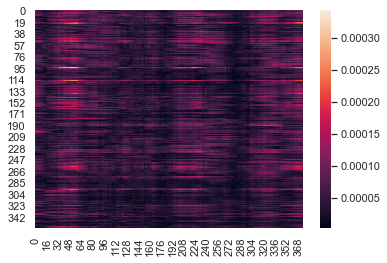

In [28]:
import seaborn as sns

sns.heatmap(v[:,158*125:161*125])

In [26]:
high = [np.array(averaging_by_parcellation(src_high1)),np.array(averaging_by_parcellation(src_high2)), 
       np.array(averaging_by_parcellation(src_high3)), np.array(averaging_by_parcellation(src_high4)), 
       np.array(averaging_by_parcellation(src_high5)), np.array(averaging_by_parcellation(src_high6)),
       np.array(averaging_by_parcellation(src_high7)), np.array(averaging_by_parcellation(src_high8)), 
       np.array(averaging_by_parcellation(src_high9)), np.array(averaging_by_parcellation(src_high10))]





In [27]:
np.savez('/users/local/Venkatesh/Generated_Data/noise_baseline_properly-done_eloreta/SI_full',high_isc_averaged = high)
#np.savez('/users/local/Venkatesh/Generated_Data/noise_baseline_properly-done_eloreta/low_isc_full',low_isc_averaged = low)

In [6]:
high = np.load('/users/local/Venkatesh/Generated_Data/noise_baseline_properly-done_eloreta/SI_full.npz')['high_isc_averaged']

In [36]:
dic = dict()
dic['condition1'] = np.array(high)
np.shape(dic['condition1'])

(10, 360, 21250)

In [126]:
[W,ISC] = CCA.train_cca(dic)

isc_results = dict()
for cond_key, cond_values in dic.items():
    print(dict(zip(['ISC', 'ISC_persecond', 'ISC_bysubject', 'A'], CCA.apply_cca(cond_values, W, 125)))['ISC_persecond'])


train_cca - calculations started. There are 1 conditions
Condition has 10 subjects, 360 sensors and 21250 samples
Elapsed time: 6 seconds.
apply_cca - calculations started
[[ 0.1011867   0.10375727  0.12447339 ... -0.00163899 -0.01867879
  -0.0011488 ]
 [ 0.06335346  0.05654379  0.04893702 ... -0.03061334 -0.03420579
  -0.04856205]
 [-0.00165692  0.00189493  0.00961003 ... -0.02416875 -0.03370943
  -0.04324967]
 ...
 [-0.02536716 -0.02190143 -0.02804907 ... -0.05621415 -0.06582087
  -0.07662942]
 [-0.0421421  -0.04283943 -0.04379232 ... -0.04737592 -0.03128914
   0.00137507]
 [-0.07403347 -0.06768732 -0.06216881 ... -0.05449209 -0.05298996
  -0.06646321]]


Text(0, 0.5, 'ISC')

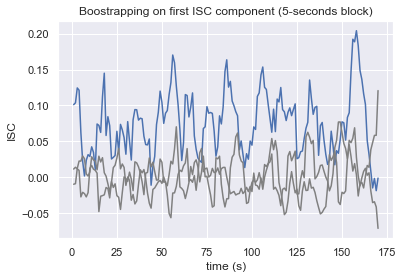

In [85]:
valstest = np.reshape(valstest,newshape=(2,360,170))
significance = np.where(np.max(np.array(valstest)[:,0,:],axis=0)<isc_results['condition1']['ISC_persecond'][0])


plt.plot(range(1,171),isc_results['condition1']['ISC_persecond'][0])
plt.plot(range(1,171),np.array(valstest)[:,0,:].T,color='grey')


plt.title('Boostrapping on first ISC component (5-seconds block)')
plt.xlabel('time (s)')
plt.ylabel('ISC')

Text(0, 0.5, 'ISC coefficient')

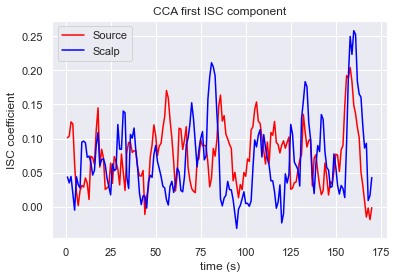

In [32]:
isc_result_old = np.load('/users/local/Venkatesh/Generated_Data/CCA_ISC.npz')['CCA_ISC']

plt.plot(range(1,171),isc_results['condition1']['ISC_persecond'][0],color='red')
plt.plot(range(1,171),isc_result_old[0],color='blue')
plt.legend(['Source','Scalp'])
plt.title('CCA first ISC component')
plt.xlabel('time (s)')
plt.ylabel('ISC coefficient')

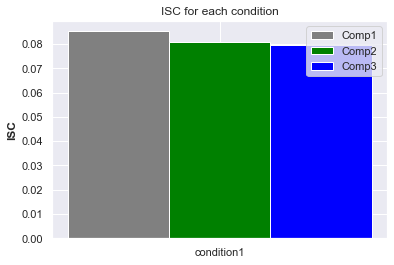

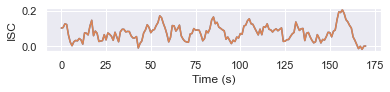

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal

def plot_isc(isc_all):
    # plot ISC as a bar chart
    plt.figure()
    comp1 = [cond['ISC'][0] for cond in isc_all.values()]
    comp2 = [cond['ISC'][1] for cond in isc_all.values()]
    comp3 = [cond['ISC'][2] for cond in isc_all.values()]
    barWidth = 0.2
    r1 = np.arange(len(comp1))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    plt.bar(r1, comp1, color='gray', width=barWidth, edgecolor='white', label='Comp1')
    plt.bar(r2, comp2, color='green', width=barWidth, edgecolor='white', label='Comp2')
    plt.bar(r3, comp3, color='blue', width=barWidth, edgecolor='white', label='Comp3')
    plt.xticks([r + barWidth for r in range(len(comp1))], isc_all.keys())
    plt.ylabel('ISC', fontweight='bold')
    plt.title('ISC for each condition')
    plt.legend()
    plt.show()

    # plot ISC_persecond
    for cond in isc_all.values():
        for comp_i in range(1):
            plt.subplot(3, 1, comp_i+1)
            plt.plot(cond['ISC_persecond'][comp_i])
            #plt.plot ((np.array(vals)[:,comp_i,:]).T)
            #peaks = scipy.signal.find_peaks(isc_results['condition1']['ISC_persecond'][comp_i],distance=15)
            plt.subplots_adjust(hspace=1)

            plt.plot(isc_results['condition1']['ISC_persecond'][comp_i])
            #plt.plot(peaks[0],isc_results['condition1']['ISC_persecond'][comp_i][peaks[0]],marker='o', ls="")

            
            plt.xlabel('Time (s)')
            plt.ylabel('ISC')
            

            #plt.title('ISC per second for each condition')
    
plot_isc(isc_results)


### Noise Floor

In [33]:
import random
from tqdm.notebook import tqdm

def shuffle(a):
    
    for k in (range(10)):
        for j in range(360):
            np.random.seed(k)
            
            chunked = chunks(a['condition1'][k][j][:21250])
            np.random.shuffle(chunked[0])
            chunked = np.reshape(chunked,[21250,])
            
    return a

def chunks(chunk):
    chunked = chunk[:21250]
    chunked= chunked.reshape(1,34,625) #5s chunk
    return chunked

        

In [183]:
from joblib import Parallel, delayed

import multiprocessing
NB_CPU = multiprocessing.cpu_count()


def process(i):
    np.random.seed(i)
    return dict(zip(['ISC', 'ISC_persecond', 'ISC_bysubject', 'A'], CCA.apply_cca(
        np.reshape( 
            np.swapaxes (
                np.random.permutation(
                    np.swapaxes( 
                        np.reshape(
                            np.array(dic['condition1'])
                        ,(10,360,625,34)), 
                    0,3)), 
            3,0) , 
        (10,360,21250))
    , W, 125)))['ISC_persecond']

v= Parallel(n_jobs=NB_CPU-1,max_nbytes=None)(delayed(process)(i) for i in tqdm(range(1000)))


  0%|          | 0/1000 [00:00<?, ?it/s]

In [182]:
v

[array([[ 0.10152376,  0.10397286,  0.12302203, ..., -0.00202178,
         -0.01752034, -0.00142159],
        [ 0.06188333,  0.05698652,  0.04901698, ..., -0.03018492,
         -0.03603976, -0.05100836],
        [-0.00136713,  0.00092233,  0.01002529, ..., -0.02435549,
         -0.02908632, -0.04370453],
        ...,
        [-0.02651756, -0.02174526, -0.028577  , ..., -0.05561295,
         -0.06147267, -0.07422803],
        [-0.04275904, -0.04285907, -0.04363003, ..., -0.04644789,
         -0.03143914,  0.00156336],
        [-0.07498204, -0.06896744, -0.06297053, ..., -0.05428548,
         -0.05454069, -0.07158804]]),
 array([[ 0.10171119,  0.10243481,  0.12288522, ..., -0.00166454,
         -0.0119286 , -0.00408293],
        [ 0.06125082,  0.05619595,  0.04861742, ..., -0.02940933,
         -0.03724542, -0.05152957],
        [-0.00147689,  0.00101355,  0.01021218, ..., -0.02433475,
         -0.03132323, -0.04300332],
        ...,
        [-0.02644678, -0.02239948, -0.028641  , ..., -

In [179]:
625*34

21250

In [ ]:
out

NameError: name 'out' is not defined

In [78]:
arr = np.ones((100,2,2)).T *np.arange(100)

In [86]:
np.random.shuffle(arr.T)

array([48., 64., 41., 99., 65., 47., 97., 68., 42., 33., 86., 87., 77.,
        4., 67., 45., 78., 10., 39., 13., 84., 61., 74.,  0., 79., 31.,
       32., 18., 75., 20., 76., 53., 11., 34., 30.,  8., 92., 37., 60.,
       72., 38., 58.,  9., 44., 15.,  1., 83., 52., 62., 89., 14., 43.,
       66.,  7., 73., 27., 19., 21., 95., 36., 88., 57., 17., 81., 28.,
        2., 51., 25., 24., 98., 82., 16., 50., 35., 85., 63., 90., 69.,
       55., 70., 56., 49., 12., 71., 94., 54., 93., 46.,  6., 29.,  3.,
       23., 96.,  5., 22., 40., 26., 59., 91., 80.])

In [42]:
#significance = np.where(np.max(np.array(valstest)[:,0,:],axis=0)<isc_results['condition1']['ISC_persecond'][0])
np.savez_compressed('/users/local/Venkatesh/Generated_Data/noise_floor_1000_on_SI_full', a=valstest)

#np.shape(np.load('noise_floor.npz')['a'])

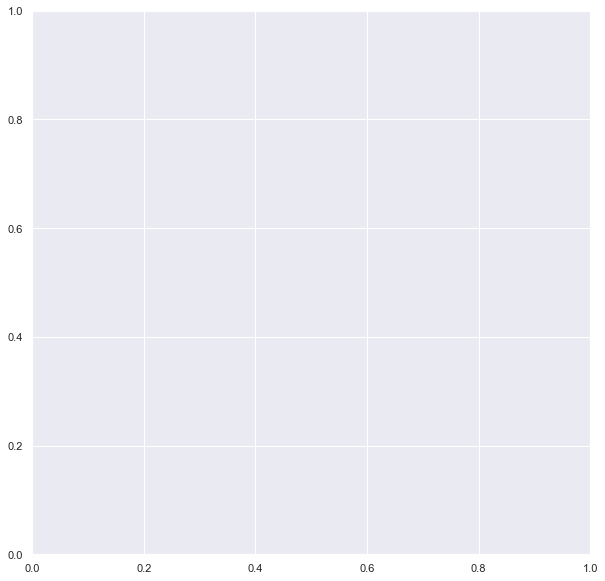

In [61]:
#np.savez('low_isc_averaged',low_isc = low_isc)

from nilearn.regions import signals_to_img_labels  
# load nilearn label masker for inverse transform
from nilearn.input_data import NiftiLabelsMasker, NiftiMasker
from nilearn.datasets import fetch_icbm152_2009
from nilearn import image, plotting
from nilearn import datasets
from os.path import join as opj


path_Glasser = 'S4B2/GSP/Glasser_masker.nii.gz'


mnitemp = fetch_icbm152_2009()
mask_mni=image.load_img(mnitemp['mask'])
glasser_atlas=image.load_img(path_Glasser)


#print(NiftiMasker.__doc__)

plt.show()
fig,ax = plt.subplots(nrows=1,ncols=1, figsize=(10,10))
signal=[]
U0_brain=[]
signal=np.expand_dims(W[:,0], axis=0) # add dimension 1 to signal array
U0_brain = signals_to_img_labels(signal,path_Glasser,mnitemp['mask'])
#plotting.plot_glass_brain(U0_brain,title='1st Spatial filter',colorbar=True,plot_abs=False,display_mode='lzr',cmap='seismic',figure=fig,axes=ax)
U0_brain.to_filename('1st_spatial_filter.nii.gz')
plotting.view_img(U0_brain,threshold=10,title='10%ile').save_as_html("10.html")

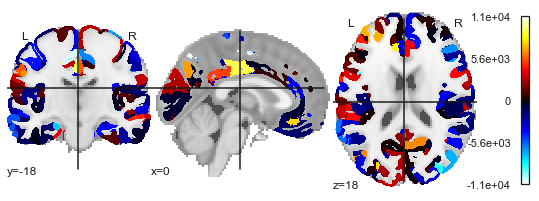

In [37]:

np.shape(W)

(360, 360)

In [55]:
np.shape(zeros)

(360, 1)

In [ ]:
numpy matplotlib sns mne pandas scipy nilearn surfplot plotly chart_studio